# UTS STAT6152 Introduction to Data Science 

## NIM:2440094352
## Name:Devin Augustin

## Exploratory data analysis and visualization using Python

### Imports and data

In [158]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

In [159]:
confirmed_cases_data_url = 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = 'time_series_covid19_deaths_global.csv'

# Import datasets as pandas dataframes
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)


### Confirmed cases of COVID-19

We'll first check out the confirmed cases data by looking at the head of the dataframe:


In [160]:
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


**Discuss:** What do you see here?
We can also see a lot about the data by using the `.info()` and `.describe()` dataframe methods:

Answer: What I can see from the table above is that I can see all the confirmed Covid-19 cases from 5 country in a form of a table from date to date ascendingly.

In [161]:
raw_data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  263 non-null    object 
 2   Lat             263 non-null    float64
 3   Long            263 non-null    float64
 4   1/22/20         263 non-null    int64  
 5   1/23/20         263 non-null    int64  
 6   1/24/20         263 non-null    int64  
 7   1/25/20         263 non-null    int64  
 8   1/26/20         263 non-null    int64  
 9   1/27/20         263 non-null    int64  
 10  1/28/20         263 non-null    int64  
 11  1/29/20         263 non-null    int64  
 12  1/30/20         263 non-null    int64  
 13  1/31/20         263 non-null    int64  
 14  2/1/20          263 non-null    int64  
 15  2/2/20          263 non-null    int64  
 16  2/3/20          263 non-null    int64  
 17  2/4/20          263 non-null    int

In [162]:
raw_data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,...,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,21.339244,22.068133,2.110266,2.486692,3.577947,5.452471,8.053232,11.129278,21.209125,23.444867,...,2738.174905,2974.885932,3260.406844,3546.026616,3852.927757,4166.984791,4552.870722,4836.939163,5114.452471,5422.418251
std,24.779585,70.785949,27.434015,27.532888,34.275498,47.702207,66.662110,89.815834,220.427512,221.769901,...,13348.022358,14659.339365,16274.718201,17892.269613,19740.409389,21707.026686,23983.928488,25717.561274,27517.452168,29418.401918
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.938500,-21.031300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,14.000000,15.000000,17.000000,19.500000,20.500000,21.000000,22.000000,24.000000,27.000000
50%,23.634500,20.168300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,126.000000,139.000000,143.000000,168.000000,176.000000,184.000000,195.000000,214.000000,226.000000,237.000000
75%,41.178850,79.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,642.500000,685.500000,715.000000,780.000000,881.000000,949.000000,983.500000,1020.000000,1068.500000,1135.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,140909.000000,161837.000000,188172.000000,213372.000000,243616.000000,275586.000000,308850.000000,337072.000000,366667.000000,396223.000000


**Discuss:** What do the above tell us?

It tells us about the summary from all the data in a statistical form.

### 1. Number of confirmed cases by country (weight 20%)

Look at the head (or tail) of our dataframe again and notice that each row is the data for a particular *province* or *state* of a given country:

In [163]:
raw_data_confirmed.tail

<bound method NDFrame.tail of                   Province/State         Country/Region       Lat       Long  \
0                            NaN            Afghanistan  33.00000  65.000000   
1                            NaN                Albania  41.15330  20.168300   
2                            NaN                Algeria  28.03390   1.659600   
3                            NaN                Andorra  42.50630   1.521800   
4                            NaN                 Angola -11.20270  17.873900   
..                           ...                    ...       ...        ...   
258  Falkland Islands (Malvinas)         United Kingdom -51.79630 -59.523600   
259    Saint Pierre and Miquelon                 France  46.88520 -56.315900   
260                          NaN            South Sudan   6.87700  31.307000   
261                          NaN         Western Sahara  24.21550 -12.885800   
262                          NaN  Sao Tome and Principe   0.18636   6.613081   

     1/22

We want the numbers for each country, though. So the way to think about this is, for each country, we want to take all the rows (*regions/provinces*) that correspond to that country and add up the numbers for each. To put this in data-analytic-speak, we want to **group by** the country column and sum up all the values for the other columns.

This is a common pattern in data analysis that we humans have been using for centuries. Interestingly, it was only formalized in 2011 by Hadley Wickham in his seminal paper [The Split-Apply-Combine Strategy for Data
Analysis](https://www.jstatsoft.org/article/view/v040i01). The pattern we're discussing is now called Split-Apply-Combine and, in the case at hand, we

- Split the data into new datasets for each country,
- Apply the function of "sum" for each new dataset (that is, we add/sum up the values for each column) to sum over territories/provinces/states for each country, and
- Combine these datasets into a new dataframe.

The `pandas` API has the `groupby` method, which allows us to do this.

In [164]:
# Group by region (also drop 'Lat', 'Long' as it doesn't make sense to sum them here)
confirmed_country = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
confirmed_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
Albania,0,0,0,0,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
Algeria,0,0,0,0,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
Andorra,0,0,0,0,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
Angola,0,0,0,0,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


So each row of our new dataframe `confirmed_country` is a time series of the number of confirmed cases for each country. Cool! 
Now a dataframe has an associated object called an Index, which is essentially a set of unique indentifiers for each row. Let's check out the index of `confirmed_country`:

In [165]:
confirmed_country.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Western Sahara',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=184)

It's indexed by `Country/Region`. That's all good **but** if we index by date **instead**, it will allow us to produce some visualizations almost immediately. This is a nice aspect of the `pandas` API: you can make basic visualizations with it and, if your index consists of DateTimes, it knows that you're plotting time series and plays nicely with them.
To make the index the set of dates, notice that the column names are the dates. To turn column names into the index, we essentially want to make the columns the rows (and the rows the columns). This corresponds to taking the transpose of the dataframe:

In [166]:
confirmed_country = confirmed_country.transpose()
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


Let's have a look at our index to see whether it actually consists of DateTimes:

In [167]:
confirmed_country.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20'],
      dtype='object')

Note that `dtype='object'`which means that these are strings, not DateTimes. We can use `pandas` to turn it into a DateTimeIndex:

In [168]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index, inplace=True)
# Check out index
confirmed_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

Now we have a DateTimeIndex and Countries for columns, we can use the dataframe plotting method to visualize the time series of confirmed number of cases by country. As there are so many coutries, we'll plot a subset of them:

### 2. Plotting confirmed cases by country (weight: 20%)

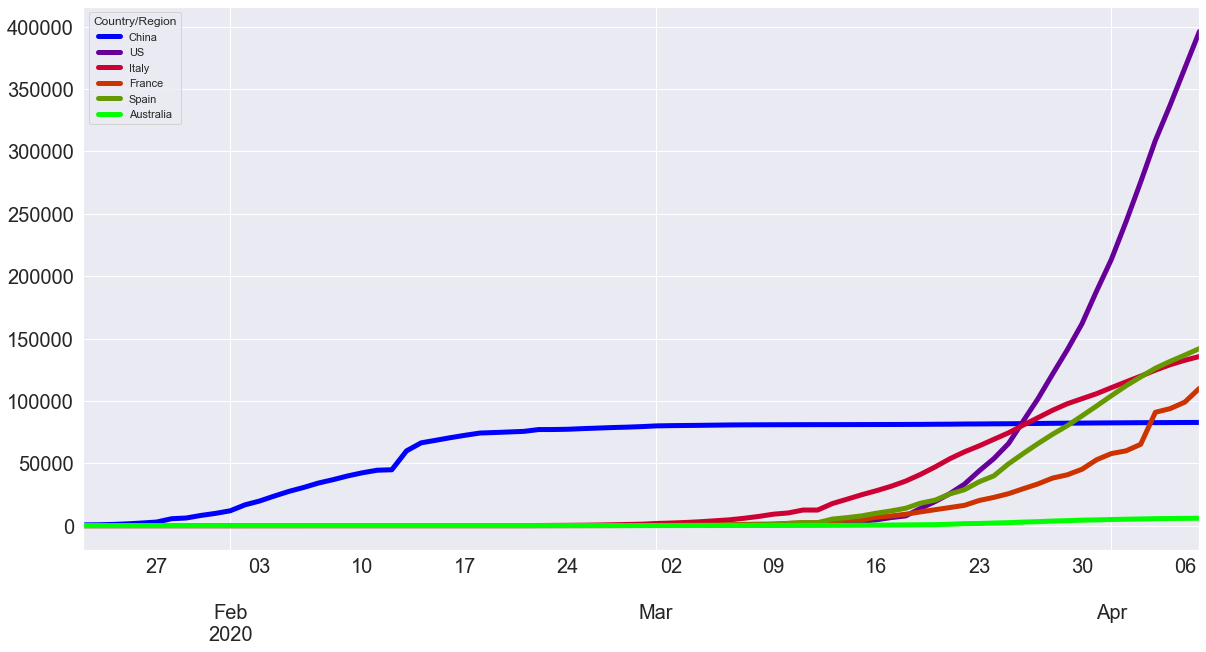

In [169]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Australia']
confirmed_country[poi].plot(figsize=(20,10), linewidth=5, colormap='brg', fontsize=20);

Let's label our axes and give the figure a title. We'll also thin the line and add points for the data so that the sampling is evident in our plots:

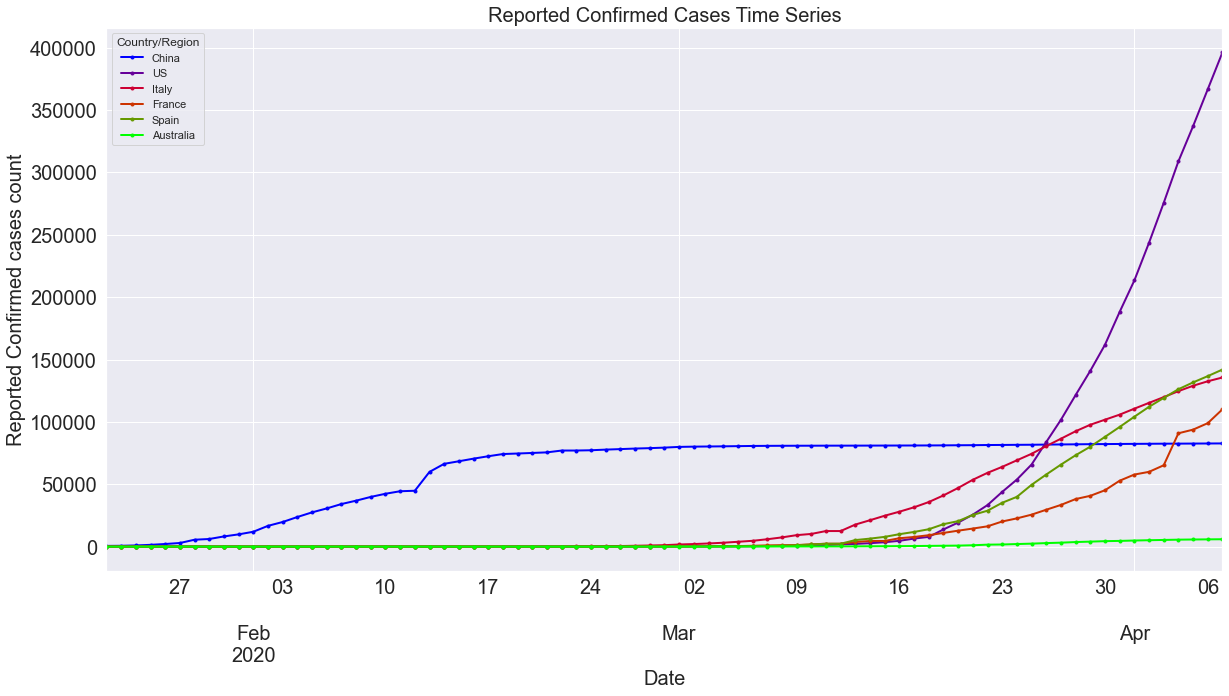

In [170]:
# Plot time series of several countries of interest
ax = confirmed_country[poi].plot(figsize=(20,10), linewidth=2,marker='.', colormap='brg', fontsize=20);
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

Let's do this again but make the y-axis logarithmic:

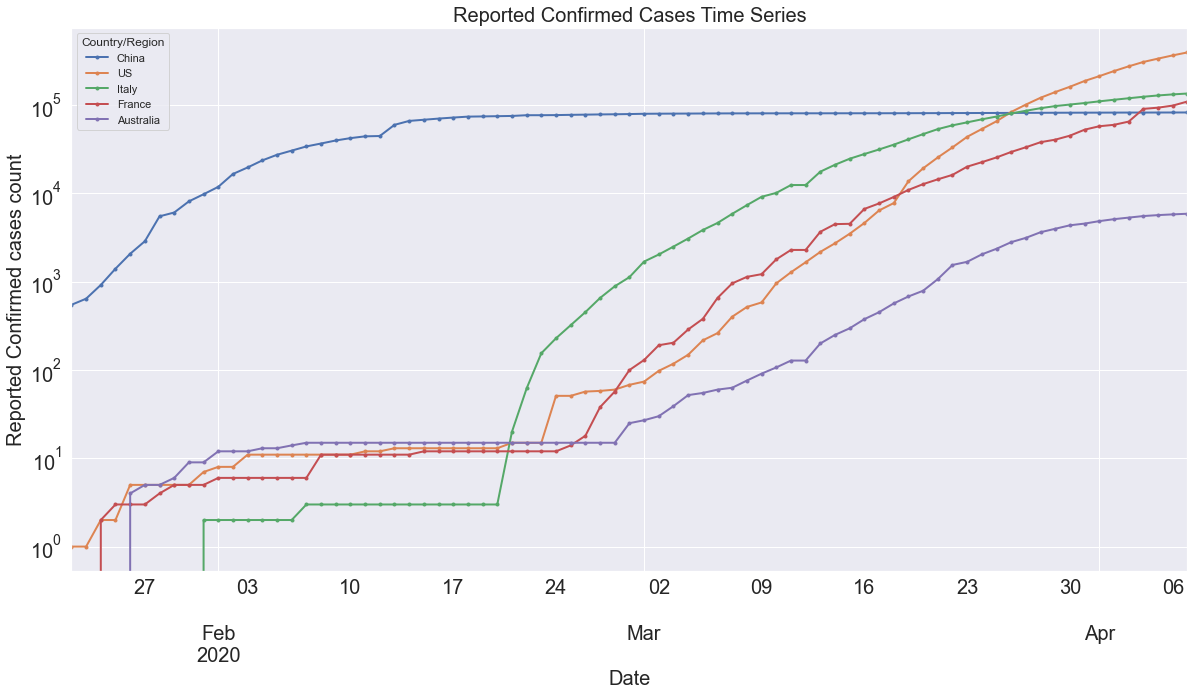

In [269]:
# Plot time series of several countries of interest
confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20,logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

**Discuss:** Why do we plot with a log y-axis? How do we interpret the log plot?
**Key points:** 
- If a variable takes on values over several orders of magnitude (e.g. in the 10s, 100s, and 1000s), we use a log axes so that the data is not all crammed into a small region of the visualization.
- If a curve is approximately linear on a log axis, then its approximately exponential growth and the gradient/slope of the line tells us about the exponent.


**ESSENTIAL POINT:** A logarithm scale is good for visualization **BUT** remember, in the thoughtful words of [Justin Bois](http://bois.caltech.edu/), "on the ground, in the hospitals, we live with the linear scale. The flattening of the US curve, for example is more evident on the log scale, but the growth is still rapid on a linear scale, which is what we feel."

**Summary:** We've 
- looked at the JHU data repository and imported the data,
- looked at the dataset containing the number of reported confirmed cases for each region,
- wrangled the data to look at the number of reported confirmed cases by country,
- plotted the number of reported confirmed cases by country (both log and semi-log),
- discussed why log plots are important for visualization and that we need to remember that we, as humans, families, communities, and society, experience COVID-19 linearly.

### 3. Number of reported deaths (weight: 30%)

As we did above for `raw_data_confirmed`, let's check out the head and the info of the `raw_data_deaths` dataframe:

In [172]:
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,6,6,7,7,11,14
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,10,11,15,15,16,17,20,20,21,22
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,31,35,44,58,86,105,130,152,173,193
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,6,8,12,14,15,16,17,18,21,22
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [173]:
raw_data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  263 non-null    object 
 2   Lat             263 non-null    float64
 3   Long            263 non-null    float64
 4   1/22/20         263 non-null    int64  
 5   1/23/20         263 non-null    int64  
 6   1/24/20         263 non-null    int64  
 7   1/25/20         263 non-null    int64  
 8   1/26/20         263 non-null    int64  
 9   1/27/20         263 non-null    int64  
 10  1/28/20         263 non-null    int64  
 11  1/29/20         263 non-null    int64  
 12  1/30/20         263 non-null    int64  
 13  1/31/20         263 non-null    int64  
 14  2/1/20          263 non-null    int64  
 15  2/2/20          263 non-null    int64  
 16  2/3/20          263 non-null    int64  
 17  2/4/20          263 non-null    int

It seems to be structured similarly to `raw_data_confirmed`. I have checked it out in detail and can confirm that it is! This is good data design as it means that users like can explore, munge, and visualize it in a fashion analogous to the above. Can you remember what we did? We

- Split-Apply-Combined it (and dropped 'Lat'/'Long'),
- Transposed it,
- Made the index a DateTimeIndex, and
- Visualized it (linear and semi-log).

Let's now do the first three steps here for `raw_data_deaths` and see how we go:



#### Number of reported deaths by country

In [174]:
# Split-Apply-Combine
deaths_country = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)

# Transpose
deaths_country = deaths_country.transpose()

# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(deaths_country.index)
deaths_country.set_index(datetime_index, inplace=True)

# Check out head
deaths_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
# Check out the index
deaths_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

#### Plotting number of reported deaths by country 

Let's now visualize the number of reported deaths:

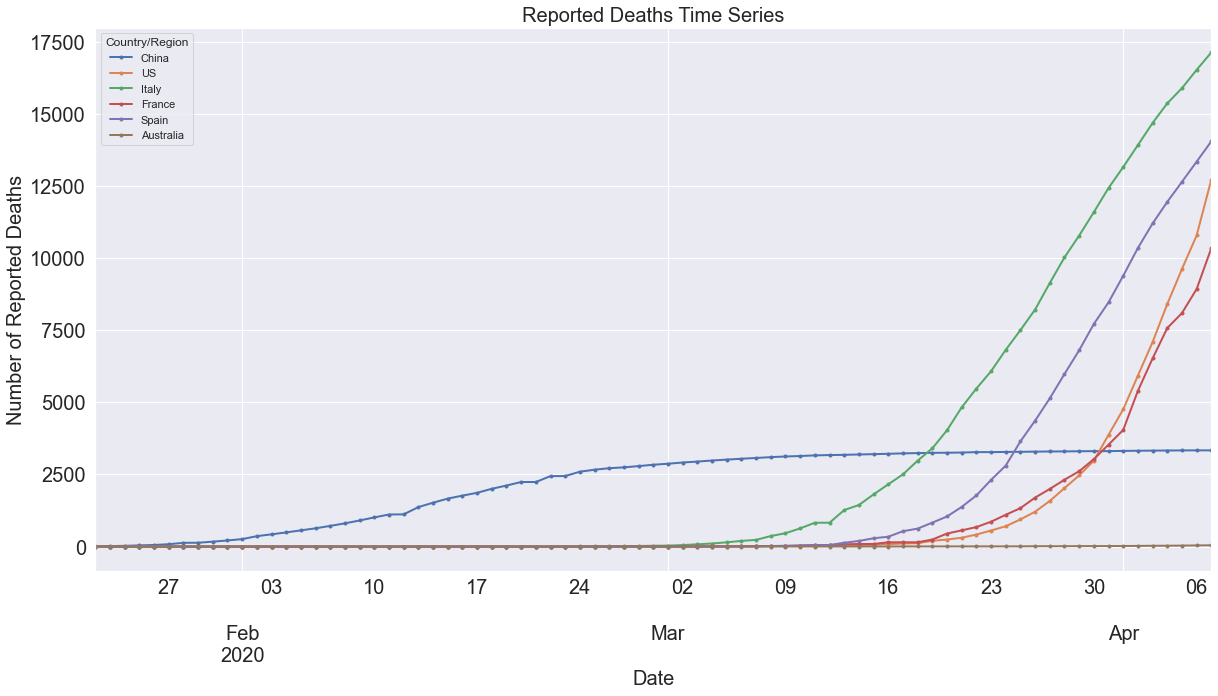

In [176]:
# Plot time series of several countries of interest
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

Now on a semi-log plot:

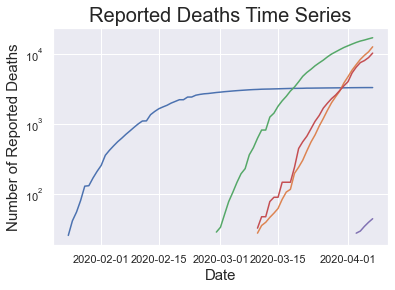

In [272]:
# Plot time series of several countries of interest
plt.semilogy(deaths_country[poi])
plt.xlabel('Date', fontsize=15);
plt.ylabel('Number of Reported Deaths', fontsize=15);
plt.title('Reported Deaths Time Series', fontsize=20);

### 4. Aligning growth curves to start with day of number of known deaths ≥ 25 (weight 30%)

To compare what's happening in different countries, we can align each country's growth curves to all start on the day when the number of known deaths ≥ 25, such as reported in the first figure [here](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html).
To achieve this, first off, let's set set all values less than 25 to NaN so that the associated data points don't get plotted at all when we visualize the data:

In [178]:
# Loop over columns & set values < 25 to None
for col in deaths_country.columns:
    deaths_country.loc[(deaths_country[col] < 25),col] = None

# Check out tail
deaths_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
2020-04-03,NaN,NaN,105.0,NaN,NaN,NaN,39.0,NaN,28.0,168.0,...,NaN,3611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,NaN,NaN,130.0,NaN,NaN,NaN,43.0,NaN,30.0,186.0,...,NaN,4320.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,NaN,NaN,152.0,NaN,NaN,NaN,44.0,NaN,35.0,204.0,...,NaN,4943.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,173.0,NaN,NaN,NaN,48.0,NaN,40.0,220.0,...,NaN,5385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,193.0,NaN,NaN,NaN,56.0,NaN,45.0,243.0,...,NaN,6171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's plot as above to make sure we see what we think we should see:

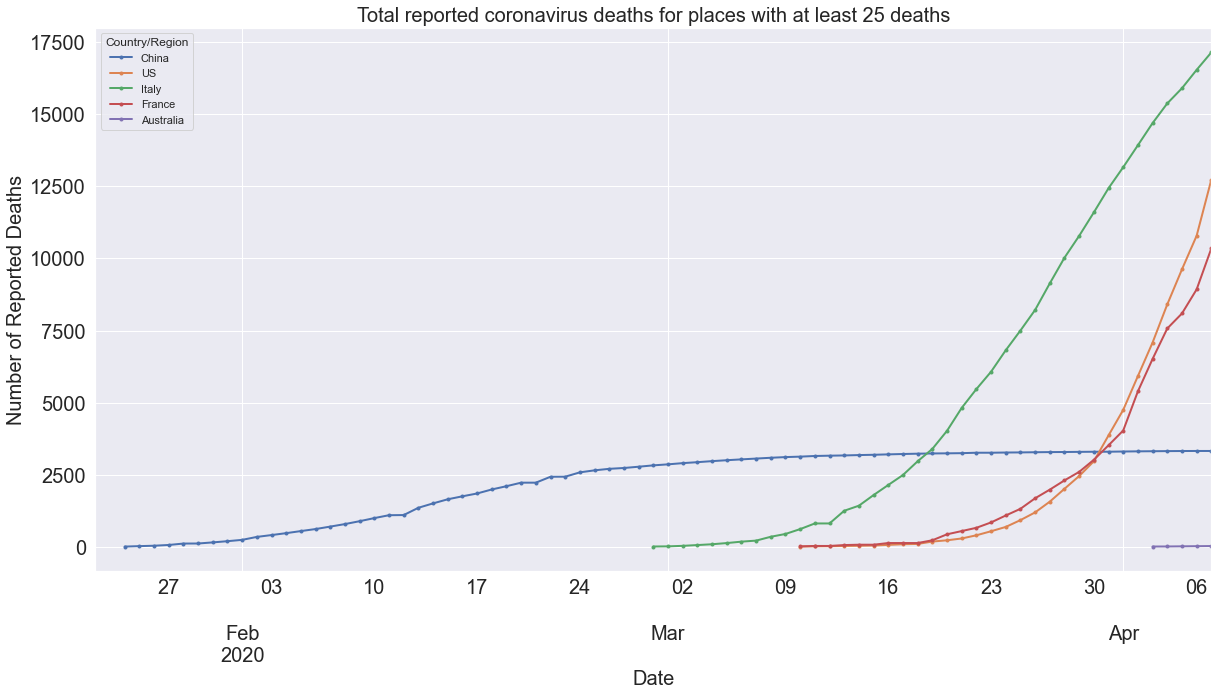

In [179]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

The countries that have seen less than 25 total deaths will have columns of all NaNs now so let's drop these and then see how many columns we have left:

In [181]:
# Drop columns that are all NaNs (i.e. countries that haven't yet reached 25 deaths)
deaths_country.dropna(how='all', axis=1, inplace=True)
deaths_country.tail()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Brazil,Canada,Chile,China,...,Serbia,Slovenia,Spain,Sweden,Switzerland,Thailand,Turkey,US,Ukraine,United Kingdom
2020-04-03,105.0,39.0,28.0,168.0,1143.0,NaN,359.0,179.0,NaN,3326.0,...,39.0,NaN,11198.0,358.0,591.0,NaN,425.0,7087.0,27.0,3611.0
2020-04-04,130.0,43.0,30.0,186.0,1283.0,NaN,445.0,218.0,27.0,3330.0,...,44.0,NaN,11947.0,373.0,666.0,NaN,501.0,8407.0,32.0,4320.0
2020-04-05,152.0,44.0,35.0,204.0,1447.0,NaN,486.0,259.0,34.0,3333.0,...,51.0,28.0,12641.0,401.0,715.0,NaN,574.0,9619.0,37.0,4943.0
2020-04-06,173.0,48.0,40.0,220.0,1632.0,29.0,564.0,339.0,37.0,3335.0,...,58.0,30.0,13341.0,477.0,765.0,26.0,649.0,10783.0,38.0,5385.0
2020-04-07,193.0,56.0,45.0,243.0,2035.0,33.0,686.0,375.0,43.0,3335.0,...,61.0,36.0,14045.0,591.0,821.0,27.0,725.0,12722.0,45.0,6171.0


As we're going to align the countries from the day they first had at least 25 deaths, we won't need the DateTimeIndex. In fact, we won't need the date at all. So we can 
- Reset the Index, which will give us an ordinal index (which turns the date into a regular column) and
- Drop the date column (which will be called 'index) after the reset.

In [200]:
# sort index, drop date column
deaths_country_drop = deaths_country.reset_index().sort_index(ascending=1).drop(['index'], axis=1)
deaths_country_drop.head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Brazil,Canada,Chile,China,...,Serbia,Slovenia,Spain,Sweden,Switzerland,Thailand,Turkey,US,Ukraine,United Kingdom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now it's time to shift each column so that the first entry is the first NaN value that it contains! To do this, we can use the `shift()` method on each column. How much do we shift each column, though? The magnitude of the shift is given by how many NaNs there are at the start of the column, which we can retrieve using the `first_valid_index()` method on the column **but** we want to shift **up**, which is negative in direction (by convention and perhaps intuition). SO let's do it.

In [254]:
# shift
for col in deaths_country_drop.columns:
    deaths_country_drop.shift(-deaths_country_drop.first_valid_index())
# check out head
deaths_country_drop.head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Brazil,Canada,Chile,China,...,Serbia,Slovenia,Spain,Sweden,Switzerland,Thailand,Turkey,US,Ukraine,United Kingdom
0,25.0,27.0,28.0,28.0,37.0,29.0,25.0,25.0,27.0,26.0,...,28.0,28.0,28.0,25.0,27.0,26.0,30.0,28.0,27.0,56.0
1,26.0,28.0,30.0,30.0,67.0,33.0,34.0,26.0,34.0,42.0,...,31.0,30.0,35.0,36.0,28.0,27.0,37.0,36.0,32.0,56.0
2,29.0,36.0,35.0,49.0,75.0,NaN,46.0,30.0,37.0,56.0,...,39.0,36.0,54.0,62.0,41.0,NaN,44.0,40.0,37.0,72.0
3,31.0,39.0,40.0,58.0,88.0,NaN,59.0,38.0,43.0,82.0,...,44.0,NaN,55.0,77.0,54.0,NaN,59.0,47.0,38.0,138.0
4,35.0,43.0,45.0,68.0,122.0,NaN,77.0,54.0,NaN,131.0,...,51.0,NaN,133.0,105.0,75.0,NaN,75.0,54.0,45.0,178.0


**Side note:** instead of looping over columns, we could have applied a lambda function to the columns of the dataframe, as follows:

In [253]:
# shift using lambda function
#deaths_country = deaths_country.apply(lambda x: x.shift(-x.first_valid_index()))

Now we get to plot our time series, first with linear axes, then semi-log:

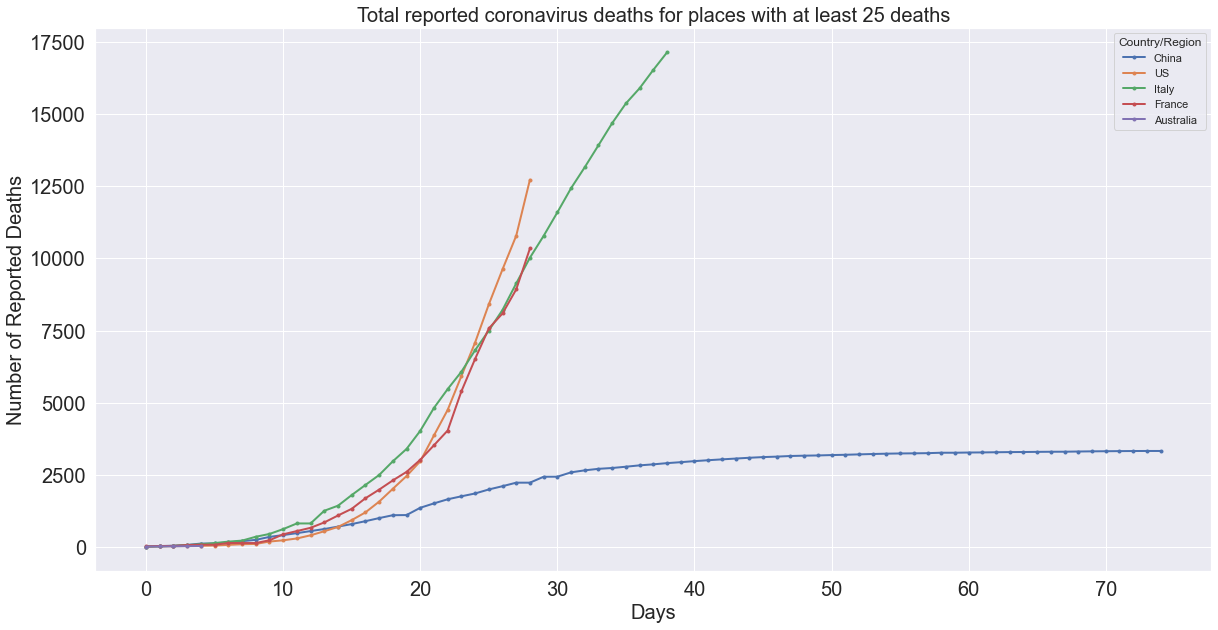

In [260]:
# Plot time series 
deaths_country_drop[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

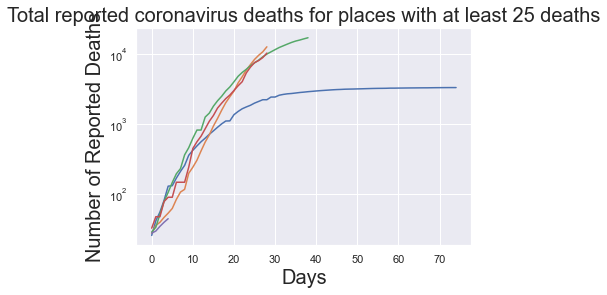

In [267]:
# Plot semi log time series 
plt.semilogy(deaths_country_drop[poi])
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

**Note:** although we have managed to plot what we wanted, the above plots are challenging to retrieve any meaningful information from. There are too many growth curves so that it's very crowded **and** too many colours look the same so it's difficult to tell which country is which from the legend. Below, we'll plot less curves and further down in the notebook we'll use the python package Altair to introduce interactivity into the plot in order to deal with this challenge.

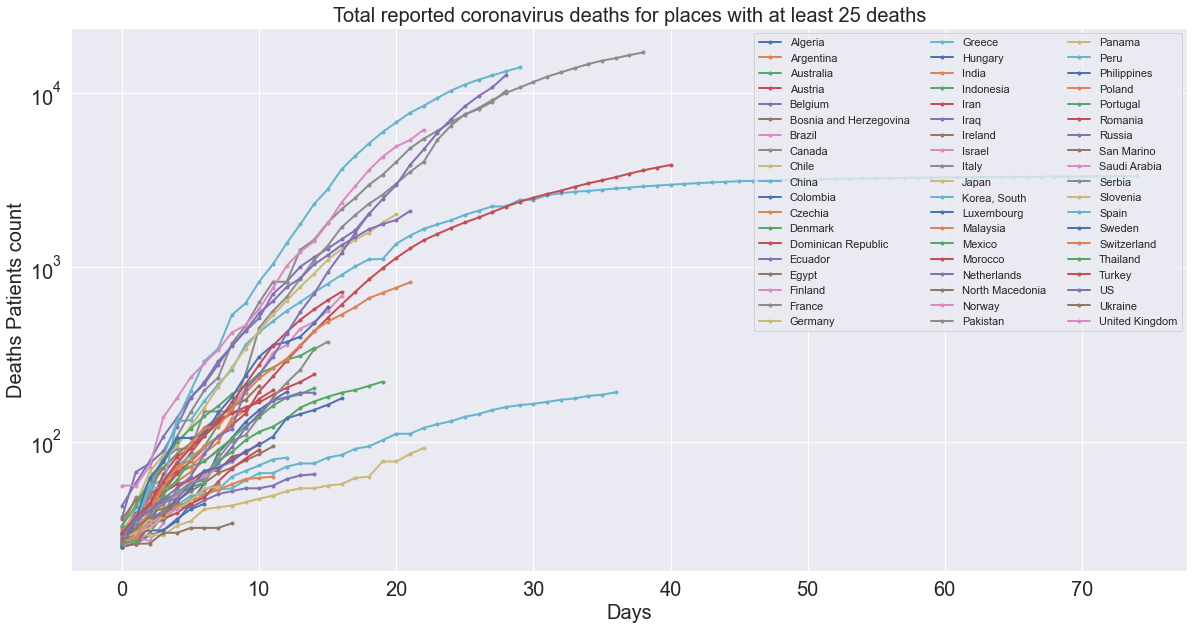

In [263]:
# Plot semi log time series 
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

**Summary:** We've 
- looked at the dataset containing the number of reported deaths for each region,
- wrangled the data to look at the number of reported deaths by country,
- plotted the number of reported deaths by country (both log and semi-log),
- aligned growth curves to start with day of number of known deaths ≥ 25.